# Explore here

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

load_dotenv()

client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

client_id, client_secret

('0473080e8e374d93b101c069372f3468', 'e8611cdf478f4bb097ad51a7e3178f7d')

In [5]:
auth_manager = SpotifyClientCredentials(
    client_id=client_id, 
    client_secret=client_secret
)
sp = spotipy.Spotify(auth_manager=auth_manager)

sp

In [6]:
artist_name = "Hozier" 

search_result = sp.search(q=artist_name, type="artist", limit=1)
artist_id = search_result["artists"]["items"][0]["id"]

artist_id

'2FXC3k01G6Gw61bmprjgqS'

In [7]:
results = sp.artist_top_tracks(artist_id)

tracks = []
for t in results["tracks"][:10]:
    tracks.append({
        "name": t["name"],
        "id": t["id"],
        "popularity": t["popularity"],
        "duration_min": t["duration_ms"] / 60000
    })

df_tracks = pd.DataFrame(tracks)
df_tracks


,name,id,popularity,duration_min
0,Too Sweet,76JKIsdKrAfWUMjaA0u7v5,79,4.190400
1,Take Me to Church,1CS7Sd1u5tWkstBhpssyjP,80,4.028133
2,Northern Attitude (with Hozier),6pBeLF2GZS3NNwV4DBvtg5,63,4.454267
3,Work Song,5TgEJ62DOzBpGxZ7WRsrqb,79,3.828583
4,Someone New,2DNXgvkyv35vTWvdgjs7qn,75,3.713550
5,Do I Wanna Know? - BBC Live Lounge,32btQnrL0HR6M1KKAPf3D3,73,4.298217
6,Would That I,37zuIvk4KBkAxxLJsxJaHq,75,4.471550
7,Rubber Band Man (with Hozier),5DJ0y9uatNMVRCqLtFxGPR,72,3.671100
8,From Eden,5aRZk9oWIYUB5alrTs8TTV,73,4.724433
9,Like Real People Do,57V4uc2b2diZ4RPHXWecb9,74,3.300483


In [ ]:
df_sorted = df_tracks.sort_values("popularity", ascending=True)
df_sorted.head(3)

,name,id,popularity,duration_min
2,Northern Attitude (with Hozier),6pBeLF2GZS3NNwV4DBvtg5,63,4.454267
7,Rubber Band Man (with Hozier),5DJ0y9uatNMVRCqLtFxGPR,72,3.671100
5,Do I Wanna Know? - BBC Live Lounge,32btQnrL0HR6M1KKAPf3D3,73,4.298217


In [ ]:
df_tracks.describe()

,popularity,duration_min
count,10.000000,10.000000
mean,74.300000,4.068072
std,4.877385,0.439962
min,63.000000,3.300483
25%,73.000000,3.742308
50%,74.500000,4.109267
75%,78.000000,4.415254
max,80.000000,4.724433


In [20]:
import time
from requests.exceptions import ReadTimeout

def safe_artist_albums(sp, artist_id, limit=50, max_retries=3, wait_time=2):
    """
    Realiza una llamada segura a artist_albums() con reintentos
    para evitar errores de TimeOut.
    """
    attempt = 1
    while attempt <= max_retries:
        try:
            return sp.artist_albums(artist_id, limit=limit)
        except ReadTimeout:
            print(f"⏳ Timeout en intento {attempt}/{max_retries}. Reintentando en {wait_time} seg...")
            time.sleep(wait_time)
            attempt += 1
        except Exception as e:
            print(f"Error inesperado: {e}")
            return {"items": []}
    
    print("Spotify no respondió a tiempo. Devolviendo resultados vacíos.")
    return {"items": []}

albums_raw = safe_artist_albums(sp, artist_id)

albums = []
for a in albums_raw.get("items", []):
    albums.append({
        "album_name": a.get("name"),
        "release_date": a.get("release_date"),
        "total_tracks": a.get("total_tracks"),
        "album_type": a.get("album_type")
    })

df_albums = pd.DataFrame(albums)
df_albums.head()


,album_name,release_date,total_tracks,album_type
0,Unreal Unearth: Unending,2024-12-06,26,album
1,Unreal Unearth: Unaired,2024-08-19,23,album
2,Unreal Unearth,2023-08-18,16,album
3,"Wasteland, Baby! (Special Edition)",2019-03-01,19,album
4,"Wasteland, Baby!",2019-03-01,14,album


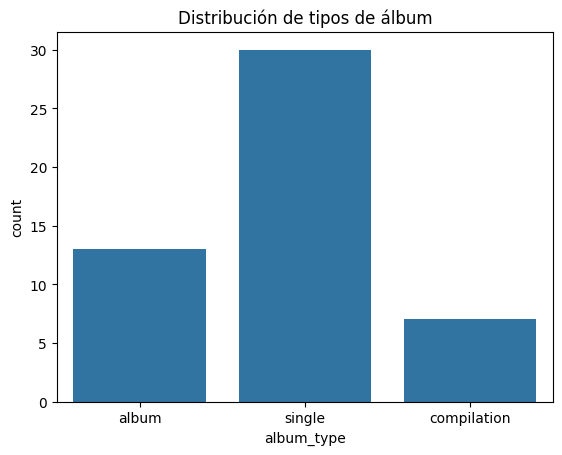

In [21]:
sns.countplot(data=df_albums, x="album_type")
plt.title("Distribución de tipos de álbum")
plt.show()


In [22]:
df_albums["album_type"].value_counts()


album_type
single         30
album          13
compilation     7
Name: count, dtype: int64